In [1]:
from pycigar.envs import Env
import yaml

import numpy as np
from scipy import signal
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

class FooEnv(Env):
    @property
    def observation_space(self):
        return Box(low=-float('inf'), high=float('inf'),
                   shape=(5,), dtype=np.float64)

    @property
    def action_space(self):
        return Box(low=0.5, high=1.5, shape=(5,), dtype=np.float64)

    def step(self, rl_actions=None, randomize_rl_update=None):
        """See parent class.
        """

        for _ in range(self.sim_params['env_config']["sims_per_step"]):
            self.env_time += 1
            
            # perform action update for PV inverter device
            if len(self.k.device.group_controllers.keys()) > 0:
                control_setting = []
                devices = []
                for group_controller_name, group_controller in self.k.device.group_controllers.items():
                    action = group_controller.get_action(self)
                    if isinstance(action, tuple):
                        if isinstance(group_controller.device_id, str):
                            devices.extend([group_controller.device_id])
                            control_setting.extend((action,))
                        else:
                            devices.extend(group_controller.device_id)
                            control_setting.extend((action,)*len(group_controller.device_id))
                    elif isinstance(action, dict):
                        devices.extend(action.keys())
                        control_setting.extend(action.values())
                self.k.device.apply_control(devices, control_setting)

            # perform action update for PV inverter device
            if len(self.k.device.get_local_device_ids()) > 0:
                control_setting = []
                for device_id in self.k.device.get_local_device_ids():
                    action = self.k.device.get_controller(device_id).get_action(self)
                    control_setting.append(action)
                self.k.device.apply_control(self.k.device.get_local_device_ids(), control_setting)


            self.additional_command()

            if self.k.time <= self.k.t:
                self.k.update(reset=False)

                # check whether the simulator sucessfully solved the powerflow
                converged = self.k.simulation.check_converged()
                if not converged:
                    break

            if self.k.time >= self.k.t:
                break

        # the episode will be finished if it is not converged.
        done = not converged or (self.k.time == self.k.t)
        obs = self.get_state()
        infos = {}
        reward = self.compute_reward(rl_actions)

        return obs, reward, done, infos

    def get_state(self):
        return [0, 0, 0, 0, 0]

    def compute_reward(self, rl_actions, **kwargs):
        return 0

stream = open("./IEEE_13_Node/pycigar_config_ieee_13_dist_no_storage.yaml", "r")
sim_params = yaml.safe_load(stream)

print('Simulation Complete')

Simulation Complete


In [2]:
from pycigar.utils.registry import register_devcon
from pycigar.controllers.battery_storage_controller import BatteryStorageController
from pycigar.devices.battery_storage_device import BatteryStorageDevice
from pycigar.devices.battery_storage_device_advanced import BatteryStorageDeviceAdvanced

# from pycigar.controllers.battery_peak_shaving_controller import BatteryPeakShavingController
from pycigar.controllers.battery_peak_shaving_controller_dist import BatteryPeakShavingControllerDist

# register_devcon('battery_storage_controller', BatteryStorageController)
# register_devcon('battery_peak_shaving_controller', BatteryPeakShavingController)
register_devcon('battery_peak_shaving_controller_dist', BatteryPeakShavingControllerDist)
register_devcon('battery_storage_device_advanced', BatteryStorageDeviceAdvanced)


'battery_storage_device_advanced'

In [3]:
import pandas as pd
network_data_directory_path = sim_params['scenario_config']['network_data_directory']
profile = pd.read_csv(network_data_directory_path)

len(profile)

14400

In [4]:
env = FooEnv(sim_params)
env.reset()
done = False
while not done:
    _, _, done, _ = env.step()
    # if env.k.time % 60 == 0:
    #     print('Time: ' + str(env.k.time))
    # if env.k.time >= 55:
    #     done = True
    
print('Simulation Complete')

Simulation Complete


In [5]:
env.k.device.devices

{'pv_671': {'device': <pycigar.devices.pv_inverter_device.PVDevice at 0x7fc13019b710>,
  'controller': <pycigar.controllers.fixed_controller.FixedController at 0x7fc1301a51d0>,
  'node_id': '671'},
 'pv_634a': {'device': <pycigar.devices.pv_inverter_device.PVDevice at 0x7fc1301a5310>,
  'controller': <pycigar.controllers.fixed_controller.FixedController at 0x7fc1301a05d0>,
  'node_id': '634a'},
 'pv_634b': {'device': <pycigar.devices.pv_inverter_device.PVDevice at 0x7fc1301a5790>,
  'controller': <pycigar.controllers.fixed_controller.FixedController at 0x7fc1301a5610>,
  'node_id': '634b'},
 'pv_634c': {'device': <pycigar.devices.pv_inverter_device.PVDevice at 0x7fc1301a5710>,
  'controller': <pycigar.controllers.fixed_controller.FixedController at 0x7fc1301a5850>,
  'node_id': '634c'},
 'pv_645': {'device': <pycigar.devices.pv_inverter_device.PVDevice at 0x7fc1301a5950>,
  'controller': <pycigar.controllers.fixed_controller.FixedController at 0x7fc1301a5750>,
  'node_id': '645'},
 'pv

In [6]:
from pycigar.utils.logging import logger

Logger = logger()

Logger.log_dict.keys()

dict_keys(['pv_671', 'pv_634a', 'pv_634b', 'pv_634c', 'pv_645', 'pv_646', 'pv_692', 'pv_675a', 'pv_675b', 'pv_675c', 'pv_611', 'pv_652', 'pv_670a', 'pv_670b', 'pv_670c', '671', '634a', '634b', '634c', '645', '646', '692', '675a', '675b', '675c', '611', '652', '670a', '670b', '670c', 'bsd_671a', 'bsd_671b', 'bsd_671c', 'network'])

In [7]:

Logger.log_dict.keys()
# Logger.log_dict.keys()


dict_keys(['pv_671', 'pv_634a', 'pv_634b', 'pv_634c', 'pv_645', 'pv_646', 'pv_692', 'pv_675a', 'pv_675b', 'pv_675c', 'pv_611', 'pv_652', 'pv_670a', 'pv_670b', 'pv_670c', '671', '634a', '634b', '634c', '645', '646', '692', '675a', '675b', '675c', '611', '652', '670a', '670b', '670c', 'bsd_671a', 'bsd_671b', 'bsd_671c', 'network'])

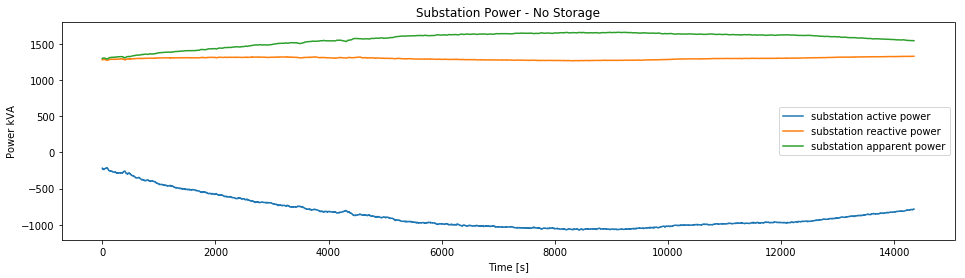

In [8]:

fig1 = plt.figure(figsize = [16, 4])
plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,0],label="substation active power")
plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,1],label="substation reactive power")
plt.plot((np.asarray(Logger.log_dict['network']['substation_power'])[:,0]**2 + np.asarray(Logger.log_dict['network']['substation_power'])[:,1]**2)**0.5,label="substation apparent power")
plt.title('Substation Power - No Storage')
plt.xlabel('Time [s]')
plt.ylabel('Power kVA')
# plt.xlim(0.0,1)
plt.legend()

plt.show()

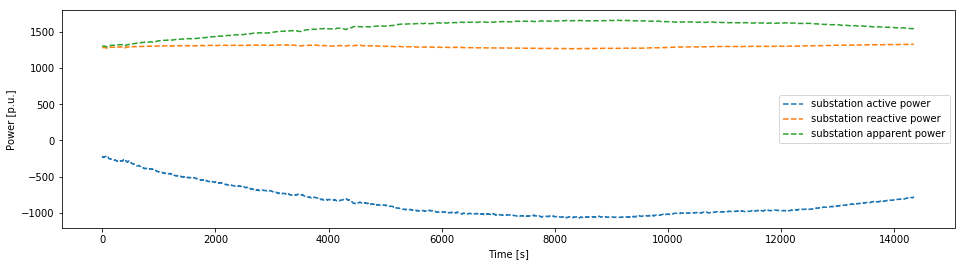

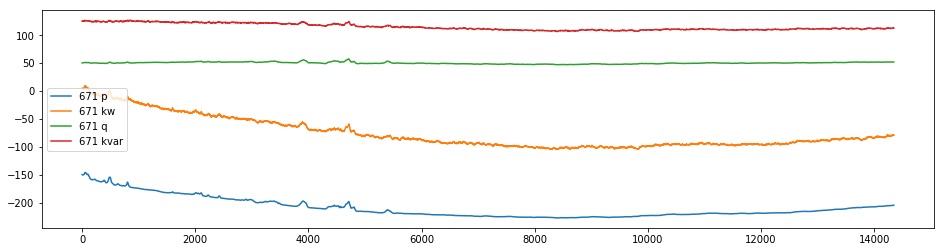

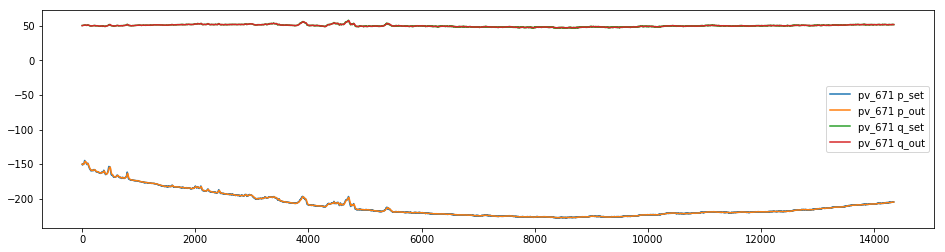

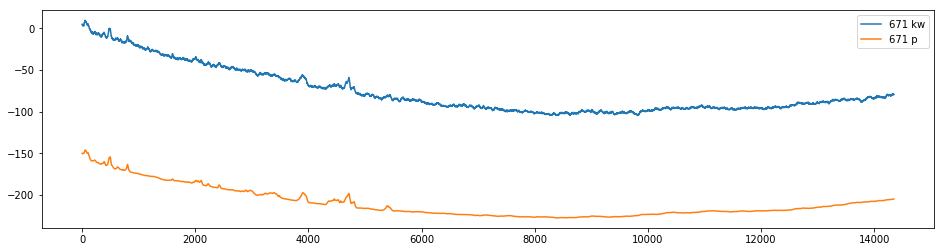

In [9]:


# fig1 = plt.figure(figsize = [16, 4])
# plt.plot(Logger.log_dict['network']['substation_top_voltage'],'--',label="bsd_1_psc P target")
# plt.plot(Logger.log_dict['network']['substation_bottom_voltage'],label="bsd_1_psc P meas lpf")
# # plt.plot(Logger.log_dict['bsd_2_psc']['measured_active_power'],label="P meas")
# # plt.plot(Logger.log_dict['bsd_2_psc']['measured_active_power_lpf'],label="bsd_2_psc P meas lpf")
# # plt.title('Battery State of Charge - External Control')
# plt.xlabel('Time [s]')
# plt.ylabel('Voltage [p.u.]')
# plt.legend()

fig1 = plt.figure(figsize = [16, 4])
plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,0],'--',label="substation active power")
plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,1],'--',label="substation reactive power")
plt.plot((np.asarray(Logger.log_dict['network']['substation_power'])[:,0]**2 + np.asarray(Logger.log_dict['network']['substation_power'])[:,1]**2)**0.5,'--',label="substation apparent power")

# plt.plot(Logger.log_dict['bsd_2_psc']['measured_active_power'],label="P meas")
# plt.plot(Logger.log_dict['bsd_2_psc']['measured_active_power_lpf'],label="bsd_2_psc P meas lpf")
# plt.title('Battery State of Charge - External Control')
plt.xlabel('Time [s]')
plt.ylabel('Power [p.u.]')
plt.legend()



# fig1 = plt.figure(figsize = [16, 4])
# plt.plot(Logger.log_dict['psc_bsd_671a']['p_target'],'--',label="psc_bsd_671a P target")
# plt.plot(Logger.log_dict['psc_bsd_671a']['measured_active_power_lpf'],label="psc_bsd_671a P meas lpf")
# plt.plot(Logger.log_dict['psc_bsd_671b']['p_target'],'--',label="psc_bsd_671b P target")
# plt.plot(Logger.log_dict['psc_bsd_671b']['measured_active_power_lpf'],label="psc_bsd_671b P meas lpf")
# plt.plot(Logger.log_dict['psc_bsd_671c']['p_target'],'--',label="psc_bsd_671c P target")
# plt.plot(Logger.log_dict['psc_bsd_671c']['measured_active_power_lpf'],label="psc_bsd_671c P meas lpf")
# # plt.plot(Logger.log_dict['bsd_2_psc']['measured_active_power'],label="P meas")
# # plt.plot(Logger.log_dict['bsd_2_psc']['measured_active_power_lpf'],label="bsd_2_psc P meas lpf")
# # plt.title('Battery State of Charge - External Control')
# # plt.xlabel('Time [s]')
# # plt.xlabel('SOC')
# plt.legend()


# fig1 = plt.figure(figsize = [16, 4])
# plt.plot(Logger.log_dict['bsd_1_psc']['p_set'],label="bsd_1_psc p_set")
# plt.plot(Logger.log_dict['bsd_2_psc']['p_set'],label="bsd_2_psc p_set")
# plt.plot(Logger.log_dict['bsd_3_psc']['p_set'],label="bsd_3_psc p_set")
# # plt.plot(Logger.log_dict['bsd_1_psc']['measured_active_power_lpf'],label="P meas lpf")
# # plt.title('Battery State of Charge - External Control')
# # plt.xlabel('Time [s]')
# # plt.xlabel('SOC')
# plt.legend()

# fig1 = plt.figure(figsize = [16, 4])
# plt.plot(np.array(Logger.log_dict['bsd_671a']['p_in'])/1e3,label="bsd_671a p_in")
# plt.plot(np.array(Logger.log_dict['bsd_671a']['p_out'])/1e3,'--',label="bsd_671a p_out")
# plt.plot(np.array(Logger.log_dict['bsd_671b']['p_in'])/1e3,label="bsd_671b p_in")
# plt.plot(np.array(Logger.log_dict['bsd_671b']['p_out'])/1e3,'--',label="bsd_671b p_out")
# plt.plot(np.array(Logger.log_dict['bsd_671c']['p_in'])/1e3,label="bsd_671b p_in")
# plt.plot(np.array(Logger.log_dict['bsd_671c']['p_out'])/1e3,'--',label="bsd_671b p_out")
# plt.legend()

# fig1 = plt.figure(figsize = [16, 4])
# plt.plot(np.array(Logger.log_dict['bsd_671a']['SOC']),label="bsd_671a SOC")
# plt.plot(np.array(Logger.log_dict['bsd_671b']['SOC']),label="bsd_671b SOC")
# plt.plot(np.array(Logger.log_dict['bsd_671c']['SOC']),label="bsd_671b SOC")
# plt.legend()


# fig1 = plt.figure(figsize = [16, 4])
# plt.plot(Logger.log_dict['bsd_1']['SOC'],label="bsd_1 SOC")
# plt.plot(Logger.log_dict['bsd_2']['SOC'],label="bsd_2 SOC")
# plt.plot(Logger.log_dict['bsd_3']['SOC'],label="bsd_3 SOC")
# # plt.plot(Logger.log_dict['bsd_1_psc']['measured_active_power_lpf'],label="P meas lpf")
# # plt.title('Battery State of Charge - External Control')
# # plt.xlabel('Time [s]')
# # plt.xlabel('SOC')
# plt.legend()

fig1 = plt.figure(figsize = [16, 4])
plt.plot(Logger.log_dict['671']['p'],label="671 p")
plt.plot(Logger.log_dict['671']['kw'],label="671 kw")
plt.plot(Logger.log_dict['671']['q'],label="671 q")
plt.plot(Logger.log_dict['671']['kvar'],label="671 kvar")
# plt.title('Battery State of Charge - External Control')
# plt.xlabel('Time [s]')
# plt.xlabel('SOC')
plt.legend()

fig1 = plt.figure(figsize = [16, 4])
plt.plot(Logger.log_dict['pv_671']['p_set'],label="pv_671 p_set")
plt.plot(Logger.log_dict['pv_671']['p_out'],label="pv_671 p_out")
plt.plot(Logger.log_dict['pv_671']['q_set'],label="pv_671 q_set")
plt.plot(Logger.log_dict['pv_671']['q_out'],label="pv_671 q_out")
# plt.title('Battery State of Charge - External Control')
# plt.xlabel('Time [s]')
# plt.xlabel('SOC')
plt.legend()

fig1 = plt.figure(figsize = [16, 4])
plt.plot(Logger.log_dict['671']['kw'],label="671 kw")
plt.plot(Logger.log_dict['671']['p'],label="671 p")
# plt.plot(Logger.log_dict['pv_671']['p_out'],label="pv_671 p_out")
# plt.title('Battery State of Charge - External Control')
# plt.xlabel('Time [s]')
# plt.xlabel('SOC')
plt.legend()


plt.show()

# fig1.savefig('/home/michael/Desktop/temp/SOC.png')

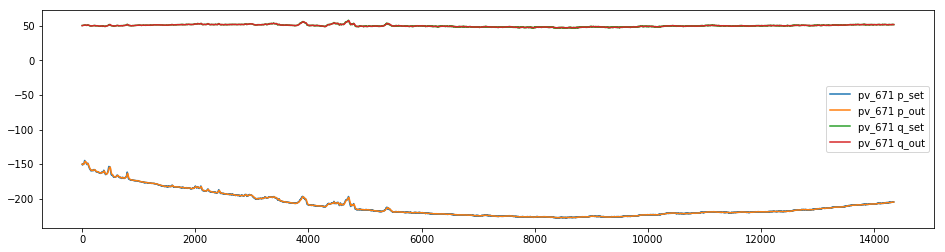

In [10]:
fig1 = plt.figure(figsize = [16, 4])
plt.plot(Logger.log_dict['pv_671']['p_set'],label="pv_671 p_set")
plt.plot(Logger.log_dict['pv_671']['p_out'],label="pv_671 p_out")
plt.plot(Logger.log_dict['pv_671']['q_set'],label="pv_671 q_set")
plt.plot(Logger.log_dict['pv_671']['q_out'],label="pv_671 q_out")
# plt.plot(Logger.log_dict['pv_671b']['SOC'],label="bsd_2 SOC")
# plt.plot(Logger.log_dict['pv_671c']['SOC'],label="bsd_3 SOC")
# plt.plot(Logger.log_dict['bsd_1_psc']['measured_active_power_lpf'],label="P meas lpf")
# plt.title('Battery State of Charge - External Control')
# plt.xlabel('Time [s]')
# plt.xlabel('SOC')
plt.legend()

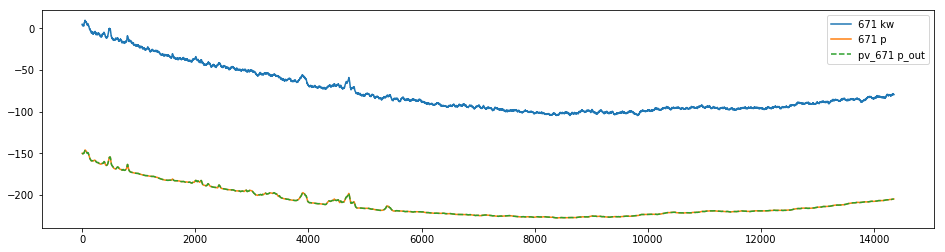

In [11]:
fig1 = plt.figure(figsize = [16, 4])
plt.plot(Logger.log_dict['671']['kw'],label="671 kw")
plt.plot(Logger.log_dict['671']['p'],label="671 p")
plt.plot(Logger.log_dict['pv_671']['p_out'],'--',label="pv_671 p_out")
# plt.title('Battery State of Charge - External Control')
# plt.xlabel('Time [s]')
# plt.xlabel('SOC')
plt.legend()

In [12]:
np.asarray(Logger.log_dict['671']['kw']) - np.asarray(Logger.log_dict['671']['p'])

array([154.81269849, 154.79103097, 154.84769214, ..., 124.97778741,
       124.94008949, 125.05105373])

In [13]:
np.asarray(Logger.log_dict['network']['substation_power'])[:,0]

array([218.06871989, 219.4290767 , 222.10492411, ..., 785.29570276,
       785.13245377, 785.06513292])